## Entendimiento de los datos

Durante el proceso de entendimiento de los datos se realizan las siguientes actividades:

* Identificación de las caracteristicas
* Análisis de las características

### Imports

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de datos

In [26]:
# Cargamos los datos de 2017 y 2021
df_2017 = pd.read_csv('data/Datos_proyecto_II_BI_2017.csv', delimiter=',', encoding='latin-1', index_col=0)
df_2021 = pd.read_csv('data/Datos_proyecto_II_BI_2021.csv', delimiter=',', encoding='latin-1', index_col=0)
df_2017_sin_asma = pd.read_csv('data/Datos_proyecto_II_BI_2017_sin_asma.csv', delimiter=',', encoding='latin-1', index_col=0)
df_2021_sin_asma = pd.read_csv('data/Datos_proyecto_II_BI_2021_sin_asma.csv', delimiter=',', encoding='latin-1', index_col=0)

df_2017_sin_asma["NPCFP14I"].value_counts()

C:\Users\dania\AppData\Local\Temp\ipykernel_15800\774556011.py:2: DtypeWarning: Columns (145,295,297,380,381,383,469,495,496,499,500,501,508,509,510,511) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2017 = pd.read_csv('data/Datos_proyecto_II_BI_2017.csv', delimiter=',', encoding='latin-1', index_col=0)
C:\Users\dania\AppData\Local\Temp\ipykernel_15800\774556011.py:3: DtypeWarning: Columns (334,410,412,540,541,543,545,549,552,553,554,555,556,557) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021 = pd.read_csv('data/Datos_proyecto_II_BI_2021.csv', delimiter=',', encoding='latin-1', index_col=0)
C:\Users\dania\AppData\Local\Temp\ipykernel_15800\774556011.py:4: DtypeWarning: Columns (12,145,146,147,280,285,295,296,297,304,379,380,381,382,383,469,470,495,496,498,499,500,501,507,508,509,510,511,512,513) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2017_sin_asma = pd.read_csv('data/Datos_proy

2    315225
Name: NPCFP14I, dtype: int64

In [27]:
# Join the datasets from the same year
df_2017 = df_2017.append(df_2017_sin_asma)
df_2021 = df_2021.append(df_2021_sin_asma)

C:\Users\dania\AppData\Local\Temp\ipykernel_15800\775989106.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2017 = df_2017.append(df_2017_sin_asma)
C:\Users\dania\AppData\Local\Temp\ipykernel_15800\775989106.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2021 = df_2021.append(df_2021_sin_asma)


In [28]:
# Change column NPCFP14B to asma
df_2017.rename(columns={'NPCFP14I': 'asma'}, inplace=True)

# Change column NPCFP14F to asma in 2021
df_2021.rename(columns={'NPCFP14F': 'asma'}, inplace=True)

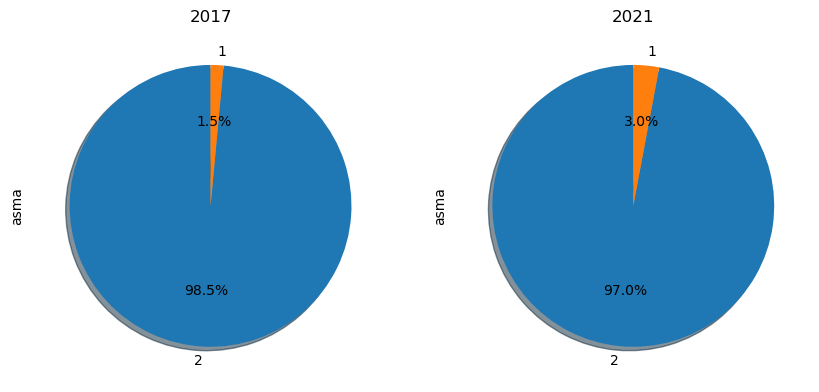

In [29]:
# Plot pie value counts for asma
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df_2017['asma'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', shadow=True, startangle=90)
df_2021['asma'].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', shadow=True, startangle=90)
ax[0].set_title('2017')
ax[1].set_title('2021')
plt.show()

In [30]:
# Select certain columns from each dataframe
variables_agua_2017 = ["NVCBP14I", "NHCCP27", "NHCCP39E", "NHCCP39F"]
df_agua_2017 = df_2017[variables_agua_2017]

# Change column names
df_agua_2017.rename(columns={'NVCBP14I': 'AguasResiduales', 'NHCCP27': 'AguaAlimentos', 'NHCCP39E': 'AguaReutilizar', 'NHCCP39F': 'AguaRecolectar'}, inplace=True)

df_agua_2017.head()

# Create column for year
df_agua_2017['Anio_agua'] = 2017

C:\Users\dania\AppData\Local\Temp\ipykernel_15800\3074007359.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agua_2017.rename(columns={'NVCBP14I': 'AguasResiduales', 'NHCCP27': 'AguaAlimentos', 'NHCCP39E': 'AguaReutilizar', 'NHCCP39F': 'AguaRecolectar'}, inplace=True)
C:\Users\dania\AppData\Local\Temp\ipykernel_15800\3074007359.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agua_2017['Anio_agua'] = 2017


In [31]:
# Select certain columns from each dataframe
variables_vivienda_2017 = ["NVCBP10", "NVCBP11B", "NVCBP11C", "NVCBP12", "NVCBP13", "NVCBP14A", "NVCBP14B", "NVCBP15D", "NVCBP15H"]

df_vivienda_2017 = df_2017[variables_vivienda_2017]

# Change column names
df_vivienda_2017.rename(columns={'NVCBP10': 'TipoVivienda', 'NVCBP11B': 'Acueducto', 'NVCBP11C': 'Alcantarillado', 'NVCBP12': 'MaterialTecho', 'NVCBP13': 'MaterialPiso', 'NVCBP14A': 'CercaniaFabricas', 'NVCBP14B': 'CercaniaBasureros', 'NVCBP15D': 'CercaniaAgua', 'NVCBP15H': 'AnimalesMolestos'}, inplace=True)

df_vivienda_2017.head()

# Create column for year
df_vivienda_2017['Anio_vivienda'] = 2017

C:\Users\dania\AppData\Local\Temp\ipykernel_15800\1729539714.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vivienda_2017.rename(columns={'NVCBP10': 'TipoVivienda', 'NVCBP11B': 'Acueducto', 'NVCBP11C': 'Alcantarillado', 'NVCBP12': 'MaterialTecho', 'NVCBP13': 'MaterialPiso', 'NVCBP14A': 'CercaniaFabricas', 'NVCBP14B': 'CercaniaBasureros', 'NVCBP15D': 'CercaniaAgua', 'NVCBP15H': 'AnimalesMolestos'}, inplace=True)
C:\Users\dania\AppData\Local\Temp\ipykernel_15800\1729539714.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vivienda_2017['Anio_vivienda'

In [32]:
# Select certain columns from each dataframe
variables_agua_2021 = ["NVCBP14I", "NHCCP27", "NHCCP39E", "NHCCP39F"]
df_agua_2021 = df_2021[variables_agua_2021]

# Change column names
df_agua_2021.rename(columns={'NVCBP14I': 'AguasResiduales', 'NHCCP27': 'AguaAlimentos', 'NHCCP39E': 'AguaReutilizar', 'NHCCP39F': 'AguaRecolectar'}, inplace=True)

df_agua_2021.head()

# Create column for year
df_agua_2021['Anio_agua'] = 2021

C:\Users\dania\AppData\Local\Temp\ipykernel_15800\1769288209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agua_2021.rename(columns={'NVCBP14I': 'AguasResiduales', 'NHCCP27': 'AguaAlimentos', 'NHCCP39E': 'AguaReutilizar', 'NHCCP39F': 'AguaRecolectar'}, inplace=True)
C:\Users\dania\AppData\Local\Temp\ipykernel_15800\1769288209.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agua_2021['Anio_agua'] = 2021


In [33]:
# Select certain columns from each dataframe
variables_vivienda_2021 = ["NVCBP10", "NVCBP11B", "NVCBP11C", "NVCBP12", "NVCBP13", "NVCBP14A", "NVCBP14B", "NVCBP15D", "NVCBP15H"]

df_vivienda_2021 = df_2021[variables_vivienda_2021]

# Change column names
df_vivienda_2021.rename(columns={'NVCBP10': 'TipoVivienda', 'NVCBP11B': 'Acueducto', 'NVCBP11C': 'Alcantarillado', 'NVCBP12': 'MaterialTecho', 'NVCBP13': 'MaterialPiso', 'NVCBP14A': 'CercaniaFabricas', 'NVCBP14B': 'CercaniaBasureros', 'NVCBP15D': 'CercaniaAgua', 'NVCBP15H': 'AnimalesMolestos'}, inplace=True)

df_vivienda_2021.head()

# Create column for year
df_vivienda_2021['Anio_vivienda'] = 2021

C:\Users\dania\AppData\Local\Temp\ipykernel_15800\3435474186.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vivienda_2021.rename(columns={'NVCBP10': 'TipoVivienda', 'NVCBP11B': 'Acueducto', 'NVCBP11C': 'Alcantarillado', 'NVCBP12': 'MaterialTecho', 'NVCBP13': 'MaterialPiso', 'NVCBP14A': 'CercaniaFabricas', 'NVCBP14B': 'CercaniaBasureros', 'NVCBP15D': 'CercaniaAgua', 'NVCBP15H': 'AnimalesMolestos'}, inplace=True)
C:\Users\dania\AppData\Local\Temp\ipykernel_15800\3435474186.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vivienda_2021['Anio_vivienda'

In [35]:
# Select certain columns from each dataframe
variables_personal_2021 = ["NPCEP4","NPCEP5","NPCEP16AB","NVCBP11AA", "asma"]

df_personal_2021 = df_2021[variables_personal_2021]

# Change column names
df_personal_2021.rename(columns={'NPCEP4': 'Edad','NPCEP5':'Sexo','NPCEP16AB':'Localidad','NVCBP11AA':'Estrato'}, inplace=True)

df_personal_2021.head()

# Create column for year
df_personal_2021['Anio_personal'] = 2021

C:\Users\dania\AppData\Local\Temp\ipykernel_15800\2611425158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_personal_2021.rename(columns={'NPCEP4': 'Edad','NPCEP5':'Sexo','NPCEP16AB':'Localidad','NVCBP11AA':'Estrato'}, inplace=True)
C:\Users\dania\AppData\Local\Temp\ipykernel_15800\2611425158.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_personal_2021['Anio_personal'] = 2021


In [36]:
# Select certain columns from each dataframe
variables_personal_2017 = ["NPCEP4","NPCEP5","NPCEP16AB","NVCBP11AA", "asma"]

df_personal_2017 = df_2017[variables_personal_2017]

# Change column names
df_personal_2017.rename(columns={'NPCEP4': 'Edad','NPCEP5':'Sexo','NPCEP16AB':'Localidad','NVCBP11AA':'Estrato'}, inplace=True)

df_personal_2017.head()

# Create column for year
df_personal_2017['Anio_personal'] = 2017

C:\Users\dania\AppData\Local\Temp\ipykernel_15800\1295420181.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_personal_2017.rename(columns={'NPCEP4': 'Edad','NPCEP5':'Sexo','NPCEP16AB':'Localidad','NVCBP11AA':'Estrato'}, inplace=True)
C:\Users\dania\AppData\Local\Temp\ipykernel_15800\1295420181.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_personal_2017['Anio_personal'] = 2017


In [39]:
# Join the datasets from the same year
df_complete_2017 = pd.concat([df_personal_2017, df_vivienda_2017, df_agua_2017], axis=1)

# Join the datasets from the same year
df_complete_2021 = pd.concat([df_personal_2021, df_vivienda_2021, df_agua_2021], axis=1)

# Join the datasets from different years
df_complete = pd.concat([df_complete_2017, df_complete_2021], axis=0)

df_complete.head()


,Edad,Sexo,Localidad,Estrato,asma,Anio_personal,TipoVivienda,Acueducto,Alcantarillado,MaterialTecho,...,CercaniaFabricas,CercaniaBasureros,CercaniaAgua,AnimalesMolestos,Anio_vivienda,AguasResiduales,AguaAlimentos,AguaReutilizar,AguaRecolectar,Anio_agua
1,39,1,NaN,4.0,1,2017,2,1,1,1,...,2,2,2,2,2017,2,1,2,2,2017
2,22,2,NaN,3.0,1,2017,2,1,1,1,...,1,1,1,1,2017,2,1,1,2,2017
3,29,2,NaN,3.0,1,2017,2,1,1,1,...,2,2,2,2,2017,2,1,1,2,2017
4,11,1,NaN,3.0,1,2017,1,1,1,1,...,2,2,2,2,2017,2,1,1,1,2017
5,37,2,19.0,3.0,1,2017,1,1,1,1,...,2,2,2,2,2017,2,1,2,2,2017


In [40]:
# Remove columns Anio_vivienda y Anio_agua
df_complete.drop(['Anio_vivienda', 'Anio_agua'], axis=1, inplace=True)

# Rename Anio_personal to Anio
df_complete.rename(columns={'Anio_personal': 'Anio'}, inplace=True)

In [41]:
df_complete["Anio"].value_counts()

2017    319952
2021    292281
Name: Anio, dtype: int64

In [42]:
df_complete.head()

,Edad,Sexo,Localidad,Estrato,asma,Anio,TipoVivienda,Acueducto,Alcantarillado,MaterialTecho,MaterialPiso,CercaniaFabricas,CercaniaBasureros,CercaniaAgua,AnimalesMolestos,AguasResiduales,AguaAlimentos,AguaReutilizar,AguaRecolectar
1,39,1,NaN,4.0,1,2017,2,1,1,1,4,2,2,2,2,2,1,2,2
2,22,2,NaN,3.0,1,2017,2,1,1,1,4,1,1,1,1,2,1,1,2
3,29,2,NaN,3.0,1,2017,2,1,1,1,2,2,2,2,2,2,1,1,2
4,11,1,NaN,3.0,1,2017,1,1,1,1,4,2,2,2,2,2,1,1,1
5,37,2,19.0,3.0,1,2017,1,1,1,1,4,2,2,2,2,2,1,2,2


In [43]:
# Create an ID for each row
df_complete['ID'] = df_complete.index
df_complete.head()

,Edad,Sexo,Localidad,Estrato,asma,Anio,TipoVivienda,Acueducto,Alcantarillado,MaterialTecho,MaterialPiso,CercaniaFabricas,CercaniaBasureros,CercaniaAgua,AnimalesMolestos,AguasResiduales,AguaAlimentos,AguaReutilizar,AguaRecolectar,ID
1,39,1,NaN,4.0,1,2017,2,1,1,1,4,2,2,2,2,2,1,2,2,1
2,22,2,NaN,3.0,1,2017,2,1,1,1,4,1,1,1,1,2,1,1,2,2
3,29,2,NaN,3.0,1,2017,2,1,1,1,2,2,2,2,2,2,1,1,2,3
4,11,1,NaN,3.0,1,2017,1,1,1,1,4,2,2,2,2,2,1,1,1,4
5,37,2,19.0,3.0,1,2017,1,1,1,1,4,2,2,2,2,2,1,2,2,5


In [44]:
# Create a table with 2 columns (ID and Description)
df_description = pd.DataFrame({'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'Description': ['TipoVivienda', 'Acueducto', 'Alcantarillado', 'MaterialTecho', 'MaterialPiso', 'CercaniaFabricas', 'CercaniaBasureros', 'CercaniaAgua', 'AnimalesMolestos', 'AguasResiduales', 'AguaAlimentos', 'AguaReutilizar', 'AguaRecolectar']})

df_description

,ID,Description
0,1,TipoVivienda
1,2,Acueducto
2,3,Alcantarillado
3,4,MaterialTecho
4,5,MaterialPiso
5,6,CercaniaFabricas
6,7,CercaniaBasureros
7,8,CercaniaAgua
8,9,AnimalesMolestos
9,10,AguasResiduales


In [45]:
# Turn all question into rows
df_complete_try = pd.melt(df_complete, id_vars=['ID', 'Anio', 'Edad', 'Sexo', 'Localidad', 'Estrato', "asma"], value_vars=['TipoVivienda', 'Acueducto', 'Alcantarillado', 'MaterialTecho', 'MaterialPiso', 'CercaniaFabricas', 'CercaniaBasureros', 'CercaniaAgua', 'AnimalesMolestos', 'AguasResiduales', 'AguaAlimentos', 'AguaReutilizar', 'AguaRecolectar'])

df_complete_try.head()

,ID,Anio,Edad,Sexo,Localidad,Estrato,asma,variable,value
0,1,2017,39,1,NaN,4.0,1,TipoVivienda,2
1,2,2017,22,2,NaN,3.0,1,TipoVivienda,2
2,3,2017,29,2,NaN,3.0,1,TipoVivienda,2
3,4,2017,11,1,NaN,3.0,1,TipoVivienda,1
4,5,2017,37,2,19.0,3.0,1,TipoVivienda,1


In [49]:
# Rename variable for pregunta
df_complete_try.rename(columns={'variable': 'Pregunta'}, inplace=True)

# Rename value for respuesta
df_complete_try.rename(columns={'value': 'Respuesta'}, inplace=True)

In [53]:
df_complete_try.head()

,ID,Anio,Edad,Sexo,Localidad,Estrato,asma,Pregunta,Respuesta
0,1,2017,39,1,NaN,4.0,1,TipoVivienda,2
1,2,2017,22,2,NaN,3.0,1,TipoVivienda,2
2,3,2017,29,2,NaN,3.0,1,TipoVivienda,2
3,4,2017,11,1,NaN,3.0,1,TipoVivienda,1
4,5,2017,37,2,19.0,3.0,1,TipoVivienda,1


In [54]:
# Change the name in the pregunta column for their id in df_description
df_complete_try['Pregunta'] = df_complete_try['Pregunta'].replace(['TipoVivienda', 'Acueducto', 'Alcantarillado', 'MaterialTecho', 'MaterialPiso', 'CercaniaFabricas', 'CercaniaBasureros', 'CercaniaAgua', 'AnimalesMolestos', 'AguasResiduales', 'AguaAlimentos', 'AguaReutilizar', 'AguaRecolectar'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

df_complete_try.head()

,ID,Anio,Edad,Sexo,Localidad,Estrato,asma,Pregunta,Respuesta
0,1,2017,39,1,NaN,4.0,1,1,2
1,2,2017,22,2,NaN,3.0,1,1,2
2,3,2017,29,2,NaN,3.0,1,1,2
3,4,2017,11,1,NaN,3.0,1,1,1
4,5,2017,37,2,19.0,3.0,1,1,1


In [55]:
# Rename pregunta for ID_Pregunta and ID for ID_Persona
df_complete_try.rename(columns={'Pregunta': 'ID_Pregunta', 'ID': 'ID_Persona'}, inplace=True)

df_complete_try.head()

,ID_Persona,Anio,Edad,Sexo,Localidad,Estrato,asma,ID_Pregunta,Respuesta
0,1,2017,39,1,NaN,4.0,1,1,2
1,2,2017,22,2,NaN,3.0,1,1,2
2,3,2017,29,2,NaN,3.0,1,1,2
3,4,2017,11,1,NaN,3.0,1,1,1
4,5,2017,37,2,19.0,3.0,1,1,1


In [61]:
# Count using Localidad
df_complete_try["Localidad"].value_counts()

8.0     20904
11.0    20137
10.0    15899
7.0     12870
19.0    11050
18.0    10088
9.0      9828
4.0      9334
1.0      8957
2.0      8203
16.0     7384
5.0      6604
12.0     5252
6.0      4953
99.0     4199
13.0     4173
14.0     3640
15.0     3536
3.0      2535
17.0     2171
20.0      299
Name: Localidad, dtype: int64

In [68]:
dict_localidad = {}

dict_localidad["15"] = "ANTONIO NARIÑO"
dict_localidad["12"] = "BARRIOS UNIDOS"
dict_localidad["7"] = "BOSA"
dict_localidad["02"] = "CHAPINERO"
dict_localidad["19"] = "CIUDAD BOLIVAR"
dict_localidad["10"] = "ENGATIVÁ"
dict_localidad["9"] = "FONTIBÓN"
dict_localidad["08"] = "KENNEDY"
dict_localidad["17"] = "LA CANDELARIA"
dict_localidad["14"] = "LOS MÁRTIRES"
dict_localidad["16"] = "PUENTE ARANDA"
dict_localidad["18"] = "RAFAEL URIBE URIBE"
dict_localidad["4"] = "SAN CRISTOBAL"
dict_localidad["3"] = "SANTAFÉ"
dict_localidad["11"] = "SUBA"
dict_localidad["13"] = "TEUSAQUILLO"
dict_localidad["6"] = "TUNJUELITO"
dict_localidad["1"] = "USAQUÉN"
dict_localidad["5"] = "USME"
dict_localidad["20"] = "SUMAPAZ"
dict_localidad["99"] = "NO SABE"

# Change string key to float key
dict_localidad = {float(k): v for k, v in dict_localidad.items()}

dict_localidad

{15.0: 'ANTONIO NARIÑO',
 12.0: 'BARRIOS UNIDOS',
 7.0: 'BOSA',
 2.0: 'CHAPINERO',
 19.0: 'CIUDAD BOLIVAR',
 10.0: 'ENGATIVÁ',
 9.0: 'FONTIBÓN',
 8.0: 'KENNEDY',
 17.0: 'LA CANDELARIA',
 14.0: 'LOS MÁRTIRES',
 16.0: 'PUENTE ARANDA',
 18.0: 'RAFAEL URIBE URIBE',
 4.0: 'SAN CRISTOBAL',
 3.0: 'SANTAFÉ',
 11.0: 'SUBA',
 13.0: 'TEUSAQUILLO',
 6.0: 'TUNJUELITO',
 1.0: 'USAQUÉN',
 5.0: 'USME',
 20.0: 'SUMAPAZ',
 99.0: 'NO SABE'}

In [70]:
# Change the name in the Localidad column
df_complete_try['Localidad'] = df_complete_try['Localidad'].replace(dict_localidad)

df_complete_try.head()

df_complete_try["Localidad"].value_counts()


KENNEDY               20904
SUBA                  20137
ENGATIVÁ              15899
BOSA                  12870
CIUDAD BOLIVAR        11050
RAFAEL URIBE URIBE    10088
FONTIBÓN               9828
SAN CRISTOBAL          9334
USAQUÉN                8957
CHAPINERO              8203
PUENTE ARANDA          7384
USME                   6604
BARRIOS UNIDOS         5252
TUNJUELITO             4953
NO SABE                4199
TEUSAQUILLO            4173
LOS MÁRTIRES           3640
ANTONIO NARIÑO         3536
SANTAFÉ                2535
LA CANDELARIA          2171
SUMAPAZ                 299
Name: Localidad, dtype: int64

In [56]:
# Export to csv
df_complete_try.to_csv('data/persona.csv', index=False)

In [58]:
# Create a table for the type of answer
df_answer = pd.DataFrame({'ID': [1, 2], 'Answer': ['Discreto', 'Continuo']})

df_answer

,ID,Answer
0,1,Discreto
1,2,Continuo


In [59]:
# Add answer to df_description, new column, ID_TipoRespuesta 1 for all
df_description['ID_TipoRespuesta'] = 1

df_description

,ID,Description,ID_TipoRespuesta
0,1,TipoVivienda,1
1,2,Acueducto,1
2,3,Alcantarillado,1
3,4,MaterialTecho,1
4,5,MaterialPiso,1
5,6,CercaniaFabricas,1
6,7,CercaniaBasureros,1
7,8,CercaniaAgua,1
8,9,AnimalesMolestos,1
9,10,AguasResiduales,1


In [60]:
# Export to csv
df_description.to_csv('data/pregunta.csv', index=False)

# Export to csv
df_answer.to_csv('data/tipo_respuesta.csv', index=False)